<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/academia/dataMining/code/rf_az_medproc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone 'https://github.com/sarang-manohar/hogwarts.git'

Cloning into 'hogwarts'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 229 (delta 118), reused 91 (delta 21), pack-reused 0
Receiving objects: 100% (229/229), 26.49 MiB | 20.02 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
rd=pd.read_csv(r'/content/hogwarts/academia/dataMining/data/azcabgptca.csv')

rd.head()

,Unnamed: 0,died,procedure,age,gender,los,type
0,1,0,1,73,0,51,0
1,2,0,0,67,0,30,1
2,3,0,1,69,0,43,0
3,4,0,1,65,0,32,0
4,5,0,1,79,0,42,1


In [ ]:
rd = rd.drop('Unnamed: 0', axis=1)

In [ ]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   died       1959 non-null   int64
 1   procedure  1959 non-null   int64
 2   age        1959 non-null   int64
 3   gender     1959 non-null   int64
 4   los        1959 non-null   int64
 5   type       1959 non-null   int64
dtypes: int64(6)
memory usage: 92.0 KB


In [ ]:
rd['died'].value_counts(normalize=True)

0    0.981623
1    0.018377
Name: died, dtype: float64

In [ ]:
dups = rd.duplicated()
rd[dups]

,died,procedure,age,gender,los,type
12,0,0,65,1,7,1
13,0,0,65,1,7,1
17,0,0,65,1,5,1
19,0,0,65,1,4,0
21,0,0,65,1,4,1
...,...,...,...,...,...,...
1938,0,1,75,0,8,1
1946,0,1,78,0,9,1
1949,0,1,78,0,8,0
1950,0,1,78,0,8,0


In [ ]:
rd.describe()

,died,procedure,age,gender,los,type
count,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000
mean,0.018377,0.474222,71.177642,0.692700,7.282797,0.456355
std,0.134344,0.499463,4.024198,0.461492,5.601206,0.498219
min,0.000000,0.000000,65.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,68.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000,71.000000,1.000000,7.000000,0.000000
75%,0.000000,1.000000,74.000000,1.000000,10.000000,1.000000
max,1.000000,1.000000,79.000000,1.000000,51.000000,1.000000


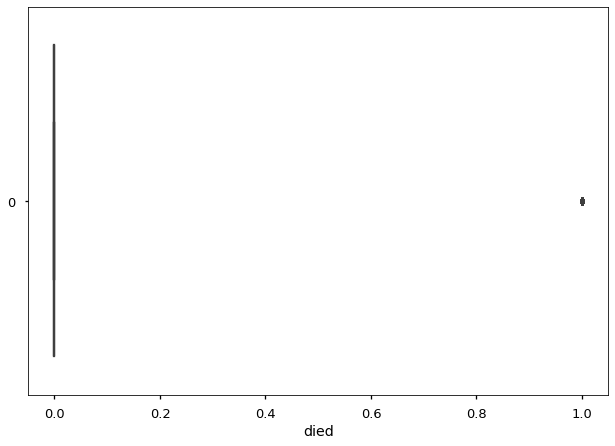

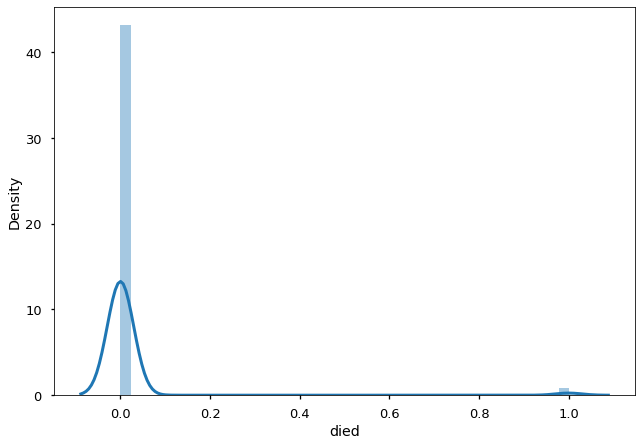

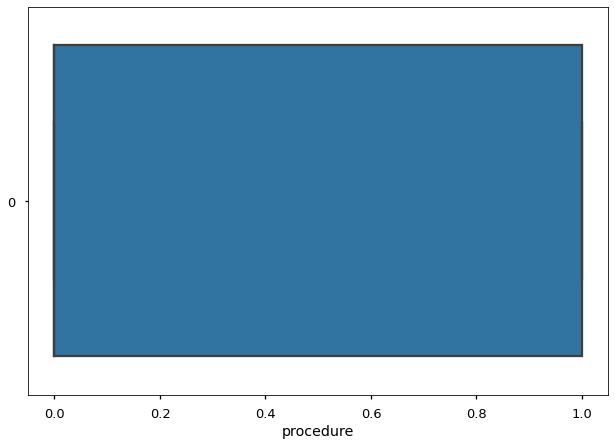

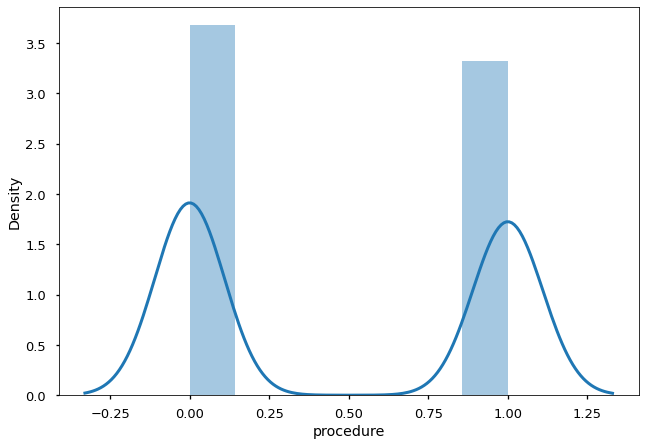

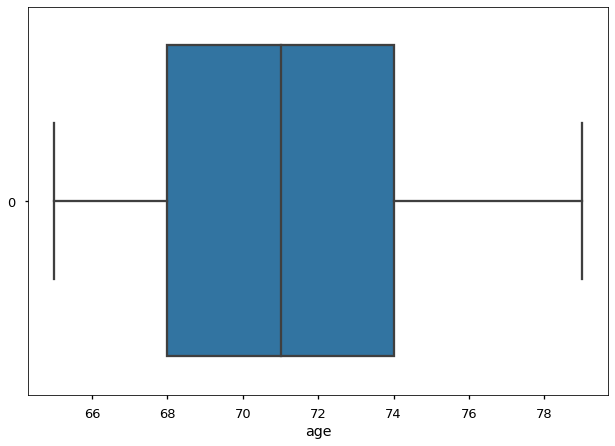

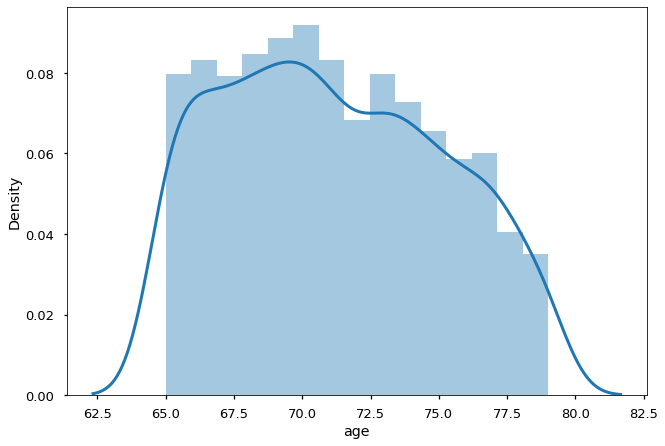

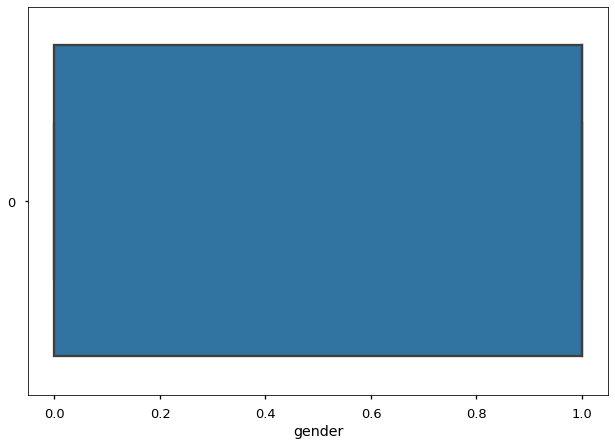

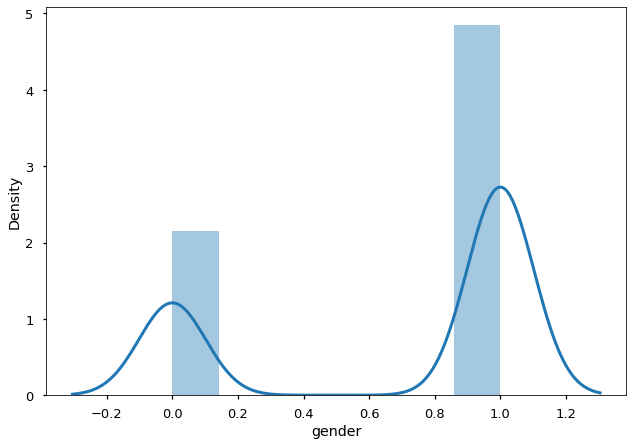

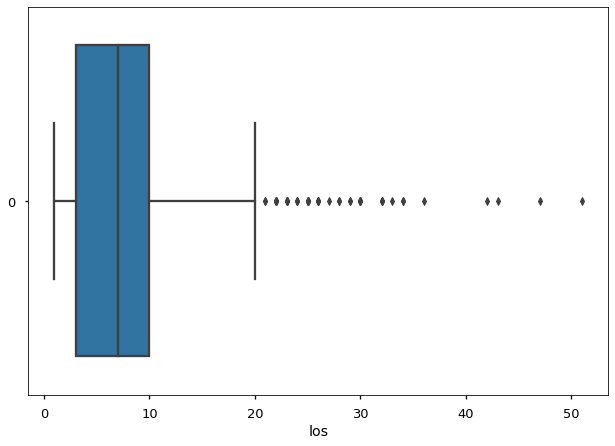

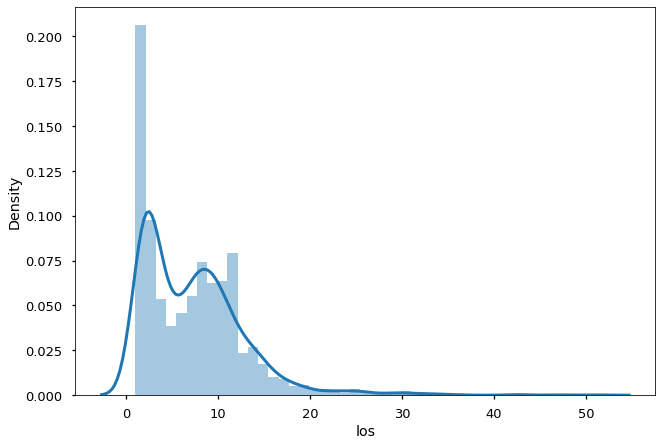

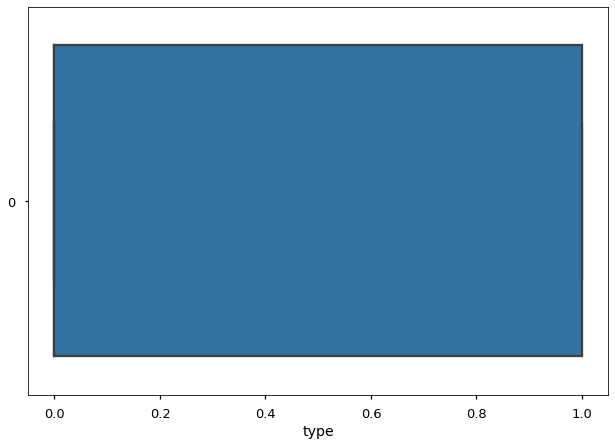

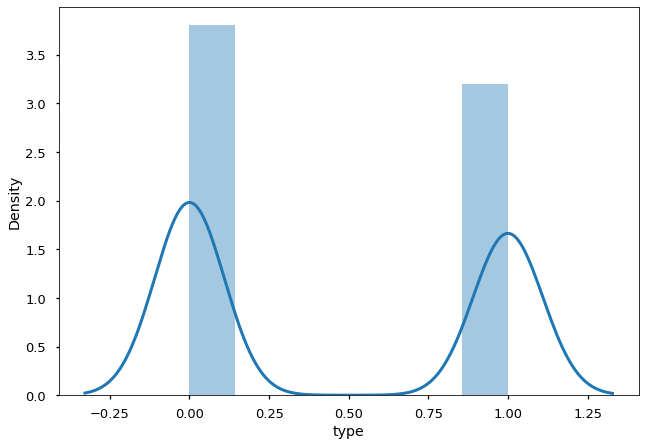

In [ ]:
for var in rd.columns:
    sns.boxplot(data=rd[var],orient='h')
    plt.xlabel(var)
    plt.show()
    sns.distplot(rd[var],hist_kws = { 'label': var},kde_kws={"lw": 3, "label": "KDE"})
    plt.xlabel(var)
    plt.show()

In [ ]:
X = rd.drop({'died'}, axis=1)

y = rd.pop('died')

In [22]:

X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.3, random_state=1)

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

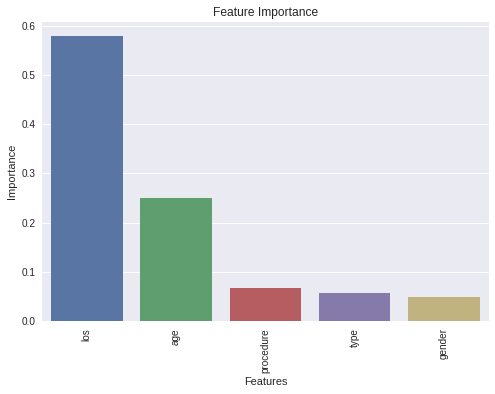

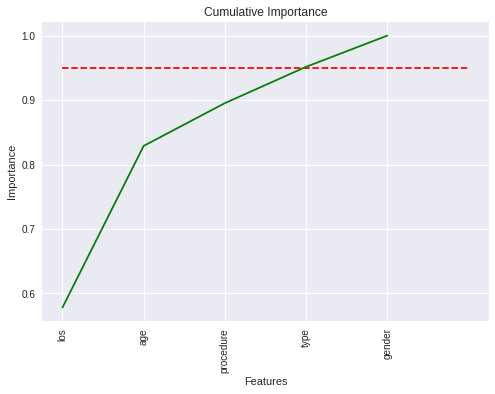

In [24]:
importances = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X_train.columns)
importances['features'] = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X_train.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

In [25]:
rf_param_grid = {
    #'max_depth' : [7],
    #'min_samples_leaf' : [20],
    'min_samples_split' : [10],
    'max_features' : [3],
    'n_estimators' : [1000]
}

In [26]:
rf_ht = RandomForestClassifier()
rf_gs = GridSearchCV(estimator=rf_ht, param_grid=rf_param_grid, cv = 3)
rf_gs.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [27]:
print(rf_gs.best_params_)
best_rf = rf_gs.best_estimator_
ytrain_predict = best_rf.predict(X_train)
ytest_predict = best_rf.predict(X_test)

{'max_features': 3, 'min_samples_split': 10, 'n_estimators': 1000}


In [28]:
#{'max_features': 3, 'min_samples_split': 10, 'n_estimators': 1000}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[1342    0]
 [  19   10]]
Accuracy score : 98.6 percent
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1342
           1       1.00      0.34      0.51        29

    accuracy                           0.99      1371
   macro avg       0.99      0.67      0.75      1371
weighted avg       0.99      0.99      0.98      1371



Random Forest stats on test data:
[[579   2]
 [  2   5]]
Accuracy score : 99.3 percent
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       0.71      0.71      0.71         7

    accuracy                           0.99       588
   macro avg       0.86      0.86      0.86       588
weighted avg       0.99      0.99      0.99       588



Area under ROC : 99.3 percent
Best Threshold=0.117948, G-Mean=0.986


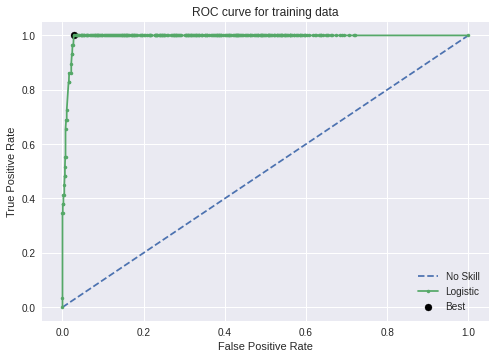

In [29]:
train_prob = best_rf.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(train_labels, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 91.8 percent
Best Threshold=0.169455, G-Mean=0.915


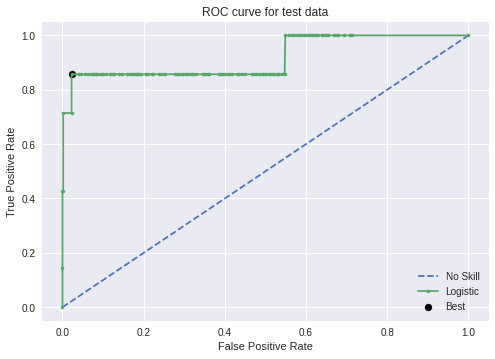

In [30]:
test_prob = best_rf.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(test_labels, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()